# Data Cleaning and Preparation

## 7.1 Handling Missing Data

In [1]:
import pandas as pd
import numpy as np

In [3]:
string_data = pd.Series(['aardvark', 'artichoke', np.nan, 'avocado'])
string_data

0     aardvark
1    artichoke
2          NaN
3      avocado
dtype: object

In [4]:
string_data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

In [5]:
string_data[0] = None
string_data

0         None
1    artichoke
2          NaN
3      avocado
dtype: object

In [6]:
string_data.isnull()

0     True
1    False
2     True
3    False
dtype: bool

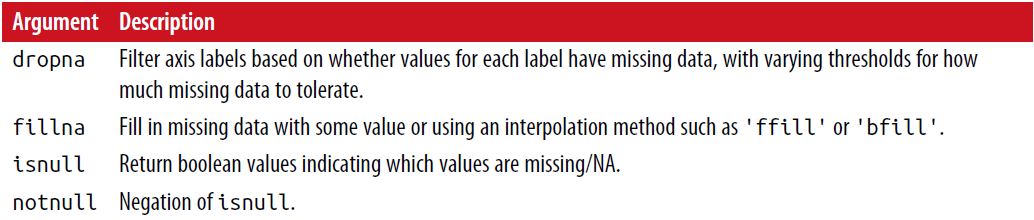

## Filtering Out Missing Data

In [7]:
from numpy import nan as NA

In [8]:
data = pd.Series([1, NA, 3.5, NA, 7])

In [9]:
data

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64

In [10]:
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

In [11]:
data[data.notnull()]

0    1.0
2    3.5
4    7.0
dtype: float64

In [12]:
data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA],[NA, NA, NA], [NA, 6.5, 3.]])
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [13]:
cleaned = data.dropna()

In [14]:
cleaned

,0,1,2
0,1.0,6.5,3.0


In [15]:
data.dropna(how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [16]:
data[4] = NA

In [17]:
data

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [18]:
data.dropna(axis=1, how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [19]:
df = pd.DataFrame(np.random.randn(7, 3))

In [20]:
df

,0,1,2
0,-0.008024,0.124447,-1.965055
1,-1.460736,-0.008793,-2.134220
2,-2.364451,-0.641362,0.017357
3,-0.564540,-2.087633,1.229659
4,0.813567,-2.073330,1.663086
5,0.884456,1.475500,1.810280
6,-0.133357,1.941673,1.198625


In [21]:
df.iloc[:4, 1] = NA
df.iloc[2,2] = NA
df

,0,1,2
0,-0.008024,NaN,-1.965055
1,-1.460736,NaN,-2.134220
2,-2.364451,NaN,NaN
3,-0.564540,NaN,1.229659
4,0.813567,-2.073330,1.663086
5,0.884456,1.475500,1.810280
6,-0.133357,1.941673,1.198625


In [22]:
df.dropna()

,0,1,2
4,0.813567,-2.073330,1.663086
5,0.884456,1.475500,1.810280
6,-0.133357,1.941673,1.198625


In [23]:
df.dropna(thresh=2)

,0,1,2
0,-0.008024,NaN,-1.965055
1,-1.460736,NaN,-2.134220
3,-0.564540,NaN,1.229659
4,0.813567,-2.073330,1.663086
5,0.884456,1.475500,1.810280
6,-0.133357,1.941673,1.198625


## Filling In Missing Data

In [24]:
df.fillna('Not a Number')

,0,1,2
0,-0.008024,Not a Number,-1.96505
1,-1.460736,Not a Number,-2.13422
2,-2.364451,Not a Number,Not a Number
3,-0.564540,Not a Number,1.22966
4,0.813567,-2.07333,1.66309
5,0.884456,1.4755,1.81028
6,-0.133357,1.94167,1.19863


In [25]:
df.fillna({1: 0.5, 2: 0})

,0,1,2
0,-0.008024,0.500000,-1.965055
1,-1.460736,0.500000,-2.134220
2,-2.364451,0.500000,0.000000
3,-0.564540,0.500000,1.229659
4,0.813567,-2.073330,1.663086
5,0.884456,1.475500,1.810280
6,-0.133357,1.941673,1.198625


In [26]:
_ = df.fillna(0, inplace=True) #modify the existing object in-place

In [28]:
df

,0,1,2
0,-0.008024,0.000000,-1.965055
1,-1.460736,0.000000,-2.134220
2,-2.364451,0.000000,0.000000
3,-0.564540,0.000000,1.229659
4,0.813567,-2.073330,1.663086
5,0.884456,1.475500,1.810280
6,-0.133357,1.941673,1.198625


In [29]:
df = pd.DataFrame(np.random.randn(6, 3))
df.iloc[2:, 1] = NA
df.iloc[4:, 2] = NA
df

,0,1,2
0,-1.553829,-0.604545,1.295886
1,1.097996,1.436123,-0.971909
2,0.325926,NaN,0.682068
3,-1.000308,NaN,0.483215
4,0.759958,NaN,NaN
5,-0.518932,NaN,NaN


In [30]:
df.fillna(method='ffill')

,0,1,2
0,-1.553829,-0.604545,1.295886
1,1.097996,1.436123,-0.971909
2,0.325926,1.436123,0.682068
3,-1.000308,1.436123,0.483215
4,0.759958,1.436123,0.483215
5,-0.518932,1.436123,0.483215


In [31]:
df.fillna(method='ffill', limit=2)

,0,1,2
0,-1.553829,-0.604545,1.295886
1,1.097996,1.436123,-0.971909
2,0.325926,1.436123,0.682068
3,-1.000308,1.436123,0.483215
4,0.759958,NaN,0.483215
5,-0.518932,NaN,0.483215


In [32]:
data = pd.Series([1., NA, 3.5, NA, 7])
data.fillna(data.mean())

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

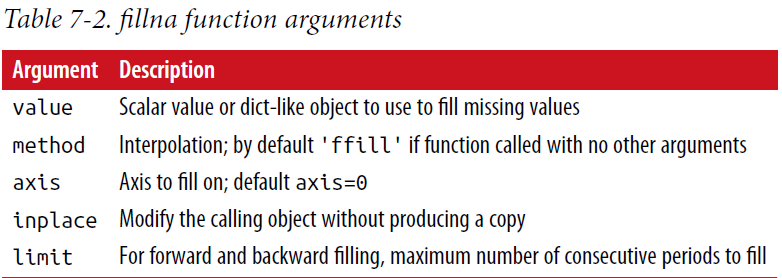

## 7.2 Data Transformation

## Removing Duplicates 

In [44]:
data = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'],'k2': [1, 1, 2, 3, 3, 4, 4]})

In [45]:
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [42]:
data = pd.read_csv('ex1.csv')
data

,class,section,std1,std2,std3,std4
0,one,a,1,2,3,4
1,one,b,5,6,7,8
2,one,c,9,10,11,12
3,one,d,13,14,15,16
4,two,e,17,18,19,20
5,two,f,21,22,23,24
6,two,g,25,26,27,28
7,two,h,29,30,31,32


In [46]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [47]:
data.drop_duplicates() #drop_duplicates returns a DataFrame where the duplicated array is False:

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


In [48]:
data['v1'] = range(7)
data

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5
6,two,4,6


In [49]:
data.drop_duplicates(['k1'])

,k1,k2,v1
0,one,1,0
1,two,1,1


In [50]:
data.drop_duplicates(['k1', 'k2'], keep='last')
# duplicated and drop_duplicates by default keep the first observed value combination.Passing keep='last' will return the last one

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
6,two,4,6


## Transforming Data Using a Function or Mapping

In [51]:
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon','Pastrami', 'corned beef', 'Bacon','pastrami', 'honey ham', 'nova lox'],'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [52]:
meat_to_animal = {'bacon': 'pig','pulled pork': 'pig','pastrami': 'cow','corned beef': 'cow','honey ham': 'pig','nova lox': 'salmon'}

In [53]:
lowercased = data['food'].str.lower()
lowercased

0          bacon
1    pulled pork
2          bacon
3       pastrami
4    corned beef
5          bacon
6       pastrami
7      honey ham
8       nova lox
Name: food, dtype: object

In [56]:
#data['animal'] = lowercased.map(meat_to_animal)
data['food'].map(lambda x: meat_to_animal[x.lower()])
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


## Replacing Values

In [57]:
data = pd.Series([1., -999., 2., -999., -1000., 3.])

In [58]:
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [59]:
data.replace(-999, np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [60]:
data.replace([-999, -1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [61]:
data.replace([-999, -1000], [np.nan, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [62]:
data.replace({-999: np.nan, -1000: 0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [63]:
#  data.replace method is distinct from data.str.replace

## Renaming Axis Indexes

In [64]:
data = pd.DataFrame(np.arange(12).reshape((3, 4)),index=['Ohio', 'Colorado', 'New York'],columns=['one', 'two', 'three', 'four'])

In [65]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [72]:
transform = lambda x : x[:4].upper()

In [73]:
data.index.map(transform)

Index(['OHIO', 'COLO', 'NEW '], dtype='object')

In [74]:
data.index = data.index.map(transform)
data

,one,two,three,four
OHIO,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


In [75]:
data.rename(index=str.title, columns=str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colo,4,5,6,7
New,8,9,10,11


In [76]:
data.rename(index={'OHIO': 'INDIANA'},columns={'three': 'peekaboo'})

,one,two,peekaboo,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


In [77]:
data

,one,two,three,four
OHIO,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


In [78]:
data.rename(index={'OHIO': 'INDIANA'}, inplace=True)

In [79]:
data

,one,two,three,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


## Discretization and Binning

In [92]:
ages = list(range(100))

In [93]:
bins = [20, 40, 60, 80, 100]

In [94]:
cats = pd.cut(ages, bins)

In [95]:
cats

[NaN, NaN, NaN, NaN, NaN, ..., (80, 100], (80, 100], (80, 100], (80, 100], (80, 100]]
Length: 100
Categories (4, interval[int64]): [(20, 40] < (40, 60] < (60, 80] < (80, 100]]

In [96]:
cats.codes

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3],
      dtype=int8)

In [97]:
cats.categories

IntervalIndex([(20, 40], (40, 60], (60, 80], (80, 100]],
              closed='right',
              dtype='interval[int64]')

In [98]:
pd.value_counts(cats)

(60, 80]     20
(40, 60]     20
(20, 40]     20
(80, 100]    19
dtype: int64

In [99]:
pd.cut(ages, [18, 26, 36, 61, 100], right=False)

[NaN, NaN, NaN, NaN, NaN, ..., [61, 100), [61, 100), [61, 100), [61, 100), [61, 100)]
Length: 100
Categories (4, interval[int64]): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

In [100]:
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']
pd.cut(ages, bins, labels=group_names)


[NaN, NaN, NaN, NaN, NaN, ..., Senior, Senior, Senior, Senior, Senior]
Length: 100
Categories (4, object): [Youth < YoungAdult < MiddleAged < Senior]

In [101]:
data = np.random.rand(20)
data

array([0.96447871, 0.33392935, 0.68647974, 0.66532566, 0.91644144,
       0.24472711, 0.28032178, 0.76875262, 0.1196608 , 0.25616208,
       0.86102716, 0.65854456, 0.11080464, 0.29768314, 0.94568739,
       0.94014998, 0.28503783, 0.07619223, 0.39817069, 0.71593406])

In [104]:
pd.cut(data, 4, precision=4)
pd.cut(data, 4, precision=1)

[(0.7, 1.0], (0.3, 0.5], (0.5, 0.7], (0.5, 0.7], (0.7, 1.0], ..., (0.7, 1.0], (0.08, 0.3], (0.08, 0.3], (0.3, 0.5], (0.5, 0.7]]
Length: 20
Categories (4, interval[float64]): [(0.08, 0.3] < (0.3, 0.5] < (0.5, 0.7] < (0.7, 1.0]]

In [107]:
data = np.random.randn(1000) # normally distributed

In [108]:
cats = pd.qcut(data, 4) # Cut into quartiles

In [109]:
cats

[(-2.972, -0.665], (-0.665, 0.00389], (0.00389, 0.675], (0.00389, 0.675], (0.00389, 0.675], ..., (-2.972, -0.665], (-2.972, -0.665], (-2.972, -0.665], (-0.665, 0.00389], (-0.665, 0.00389]]
Length: 1000
Categories (4, interval[float64]): [(-2.972, -0.665] < (-0.665, 0.00389] < (0.00389, 0.675] < (0.675, 3.417]]

In [110]:
pd.value_counts(cats)

(0.675, 3.417]       250
(0.00389, 0.675]     250
(-0.665, 0.00389]    250
(-2.972, -0.665]     250
dtype: int64

In [111]:
## cut you can pass your own quantiles (numbers between 0 and 1, inclusive):
pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.])

[(-2.972, -1.276], (-1.276, 0.00389], (0.00389, 1.312], (0.00389, 1.312], (0.00389, 1.312], ..., (-1.276, 0.00389], (-1.276, 0.00389], (-2.972, -1.276], (-1.276, 0.00389], (-1.276, 0.00389]]
Length: 1000
Categories (4, interval[float64]): [(-2.972, -1.276] < (-1.276, 0.00389] < (0.00389, 1.312] < (1.312, 3.417]]

In [116]:
np.random.seed(12345)
values = np.random.rand(10)
values

array([0.92961609, 0.31637555, 0.18391881, 0.20456028, 0.56772503,
       0.5955447 , 0.96451452, 0.6531771 , 0.74890664, 0.65356987])

In [117]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]

In [118]:
pd.get_dummies(pd.cut(values,bins))

   (0.0, 0.2]  (0.2, 0.4]  (0.4, 0.6]  (0.6, 0.8]  (0.8, 1.0]
0           0           0           0           0           1
1           0           1           0           0           0
2           1           0           0           0           0
3           0           1           0           0           0
4           0           0           1           0           0
5           0           0           1           0           0
6           0           0           0           0           1
7           0           0           0           1           0
8           0           0           0           1           0
9           0           0           0           1           0

## 7.3 String Manipulation

## String Object Methods

In [3]:
val = 'a,b,c,d,e,f.g,h.i.j,lmn,o.p,q.r.s,t,uv,w,x,y.z'
val.split('.')
val.split(',')

['a',
 'b',
 'c',
 'd',
 'e',
 'f.g',
 'h.i.j',
 'lmn',
 'o.p',
 'q.r.s',
 't',
 'uv',
 'w',
 'x',
 'y.z']

In [4]:
pieces = [x.strip() for x in val.split(',')]

In [5]:
pieces

['a',
 'b',
 'c',
 'd',
 'e',
 'f.g',
 'h.i.j',
 'lmn',
 'o.p',
 'q.r.s',
 't',
 'uv',
 'w',
 'x',
 'y.z']

In [6]:
'guido' in val

False

In [7]:
val.index(',')

1

In [8]:
val.find(':')

-1

In [13]:
#difference between find and index is that index raises an exception if the string isn’t found (versus returning –1):
val.index('.')
val.index('.')
val.index(':')

ValueError: substring not found

In [23]:
val.replace(',',':')
val.replace('.',':')

'a,b,c,d,e,f:g,h:i:j,lmn,o:p,q:r:s,t,uv,w,x,y:z'

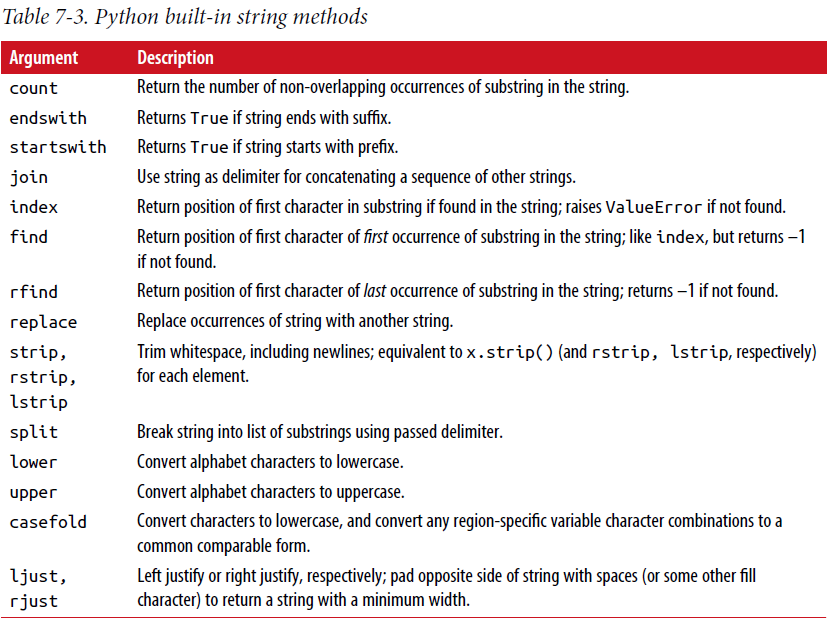

## Regular Expressions

In [2]:
import re

In [3]:
text = "foo bar\t baz \tqux"
re.split('\s+', text)

['foo', 'bar', 'baz', 'qux']

In [4]:
regex = re.compile('\s+')

In [5]:
regex

re.compile(r'\s+', re.UNICODE)

In [6]:
regex.split(text)

['foo', 'bar', 'baz', 'qux']

In [7]:
regex.findall(text)

[' ', '\t ', ' \t']

In [8]:
txt2 = 'https://search.yahoo.com/yhs/search?hspart=yahoo&hsimp=yhs-g85&p=Website%20Domain%20Names&type=Website%20Domain%20Names-mt-374294802647-dc&gclid=EAIaIQobChMI1eKs9PDt6QIVluJ3Ch1pqwlMEAAYBCAAEgKNPPD_BwE'
re.split('\s+',txt2)

['https://search.yahoo.com/yhs/search?hspart=yahoo&hsimp=yhs-g85&p=Website%20Domain%20Names&type=Website%20Domain%20Names-mt-374294802647-dc&gclid=EAIaIQobChMI1eKs9PDt6QIVluJ3Ch1pqwlMEAAYBCAAEgKNPPD_BwE']

In [9]:
regex = re.compile('\s+')

In [10]:
regex

re.compile(r'\s+', re.UNICODE)

In [11]:
regex.split(txt2)

['https://search.yahoo.com/yhs/search?hspart=yahoo&hsimp=yhs-g85&p=Website%20Domain%20Names&type=Website%20Domain%20Names-mt-374294802647-dc&gclid=EAIaIQobChMI1eKs9PDt6QIVluJ3Ch1pqwlMEAAYBCAAEgKNPPD_BwE']

In [12]:
regex.findall(txt2)

[]

In [13]:
text = """Dave dave@google.com
        Steve steve@gmail.com
        Rob rob@gmail.com
        Ryan ryan@yahoo.com
        """
pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'
# re.IGNORECASE makes the regex case-insensitive
regex = re.compile(pattern, flags=re.IGNORECASE)

In [14]:
regex.findall(text)

['dave@google.com', 'steve@gmail.com', 'rob@gmail.com', 'ryan@yahoo.com']

In [15]:
regex.findall(txt2)

[]

In [16]:
m = regex.search(text)
m

<re.Match object; span=(5, 20), match='dave@google.com'>

In [17]:
text[m.start():m.end()]

'dave@google.com'

In [18]:
print(regex.match(text))

None


In [19]:
print(regex.sub('REDACTED', text))

Dave REDACTED
        Steve REDACTED
        Rob REDACTED
        Ryan REDACTED
        


In [20]:
pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'
regex = re.compile(pattern, flags=re.IGNORECASE)

In [21]:
m = regex.match('wesm@bright.net')
m.groups()

('wesm', 'bright', 'net')

In [22]:
regex.findall(text)

[('dave', 'google', 'com'),
 ('steve', 'gmail', 'com'),
 ('rob', 'gmail', 'com'),
 ('ryan', 'yahoo', 'com')]

In [23]:
print(regex.sub(r'Username: \1, Domain: \2, Suffix: \3', text))

Dave Username: dave, Domain: google, Suffix: com
        Steve Username: steve, Domain: gmail, Suffix: com
        Rob Username: rob, Domain: gmail, Suffix: com
        Ryan Username: ryan, Domain: yahoo, Suffix: com
        


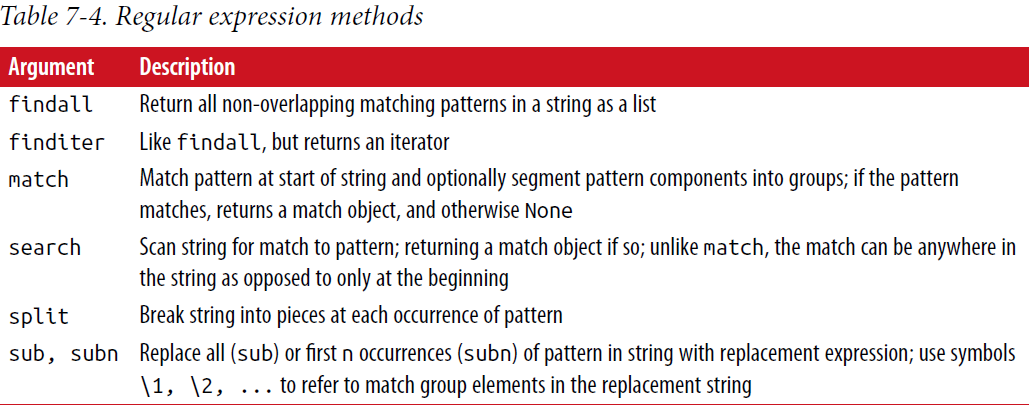

## Vectorized String Functions in pandas

In [24]:
data = {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com','Rob': 'rob@gmail.com', 'Wes': np.nan}

In [25]:
data = pd.Series(data)
data

Dave     dave@google.com
Steve    steve@gmail.com
Rob        rob@gmail.com
Wes                  NaN
dtype: object

In [26]:
data.isnull()

Dave     False
Steve    False
Rob      False
Wes       True
dtype: bool

In [27]:
data.str.contains('gmail')

Dave     False
Steve     True
Rob       True
Wes        NaN
dtype: object

In [28]:
pattern

'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\\.([A-Z]{2,4})'

In [29]:
data.str.findall(pattern, flags=re.IGNORECASE)

Dave     [(dave, google, com)]
Steve    [(steve, gmail, com)]
Rob        [(rob, gmail, com)]
Wes                        NaN
dtype: object

In [30]:
matches = data.str.match(pattern, flags=re.IGNORECASE)
matches

Dave     True
Steve    True
Rob      True
Wes       NaN
dtype: object

In [31]:
matches.str.get(1)

Dave    NaN
Steve   NaN
Rob     NaN
Wes     NaN
dtype: float64

In [32]:
matches.str[0]

Dave    NaN
Steve   NaN
Rob     NaN
Wes     NaN
dtype: float64

In [33]:
data.str[:5]

Dave     dave@
Steve    steve
Rob      rob@g
Wes        NaN
dtype: object

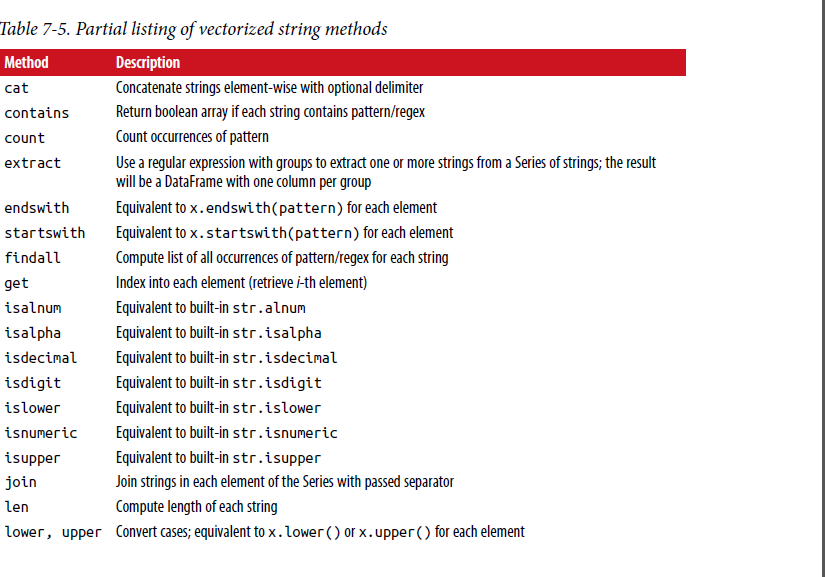

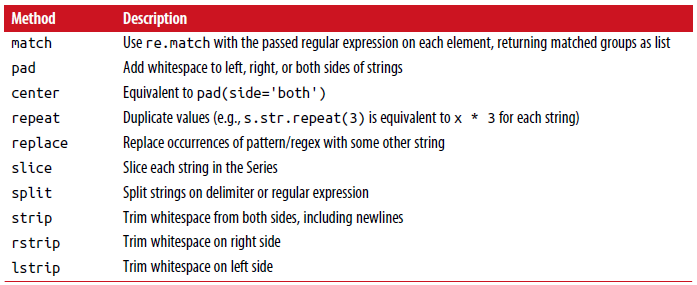